In [1]:
import pandas as pd
df_sig_info = pd.read_csv('../data/siginfo_beta.txt', sep='\t')       # Metadata for level 5 profiles

/tmp/ipykernel_32300/330502011.py:2: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sig_info = pd.read_csv('../data/siginfo_beta.txt', sep='\t')       # Metadata for level 5 profiles


In [2]:
df_sig_info

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
0,b17,NaN,100.0,ug/ml,100 ug/ml,336 h,336.0,h,N8,BRD-U44432129,...,NAMEC8,H05|H06|H07|H08,MET001_N8_XH_X1_B17,MET001_N8_XH_X1_B17:H05|MET001_N8_XH_X1_B17:H0...,NaN,MET,BRD-U44432129,0,0.0,0.0
1,b15,10.0,10.0,uM,10 uM,3 h,3.0,h,A549,BRD-K81418486,...,A549,L04|L08|L12,ABY001_A549_XH_X1_B15,ABY001_A549_XH_X1_B15:L04|ABY001_A549_XH_X1_B1...,NaN,ABY,vorinostat,0,1.0,0.0
2,b15,2.5,2.5,uM,2.5 uM,24 h,24.0,h,HT29,BRD-K70511574,...,HT29,E18|E22,ABY001_HT29_XH_X1_B15,ABY001_HT29_XH_X1_B15:E18|ABY001_HT29_XH_X1_B1...,NaN,ABY,HMN-214,0,1.0,0.0
3,b18,10.0,10.0,uM,10 uM,3 h,3.0,h,HME1,BRD-K81418486,...,HME1,F19,LTC002_HME1_3H_X1_B18,LTC002_HME1_3H_X1_B18:F19,NaN,LTC,vorinostat,0,0.0,0.0
4,b15,10.0,10.0,uM,10 uM,3 h,3.0,h,H1975,BRD-A61304759,...,H1975,P01|P05|P09,ABY001_H1975_XH_X1_B15,ABY001_H1975_XH_X1_B15:P01|ABY001_H1975_XH_X1_...,NaN,ABY,tanespimycin,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201939,b18,10.0,10.0,uM,10 uM,24 h,24.0,h,HCC515,BRD-K48853221,...,HCC515,K01,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:K01|DOSVAL001_HCC5...,NaN,DOSVAL,BRD-K48853221,1,1.0,0.0
1201940,b18,10.0,10.0,uM,10 uM,24 h,24.0,h,HCC515,BRD-K90382497,...,HCC515,O03,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:O03|DOSVAL001_HCC5...,NaN,DOSVAL,GW-843682X,0,1.0,0.0
1201941,b19,20.0,20.0,uM,20 uM,24 h,24.0,h,HCC515,BRD-K45785972,...,HCC515,M22,DOSVAL002_HCC515_24H_X1.L2_B19|DOSVAL002_HCC51...,DOSVAL002_HCC515_24H_X1.L2_B19:M22|DOSVAL002_H...,NaN,DOSVAL,BRD-K45785972,0,1.0,0.0
1201942,b19,4.0,5.0,uM,4 uM,24 h,24.0,h,A375,BRD-K28513938,...,A375,E09,DOSVAL004_A375_24H_X1.A2_B19|DOSVAL004_A375_24...,DOSVAL004_A375_24H_X1.A2_B19:E09|DOSVAL004_A37...,NaN,DOSVAL,BRD-K28513938,0,1.0,0.0


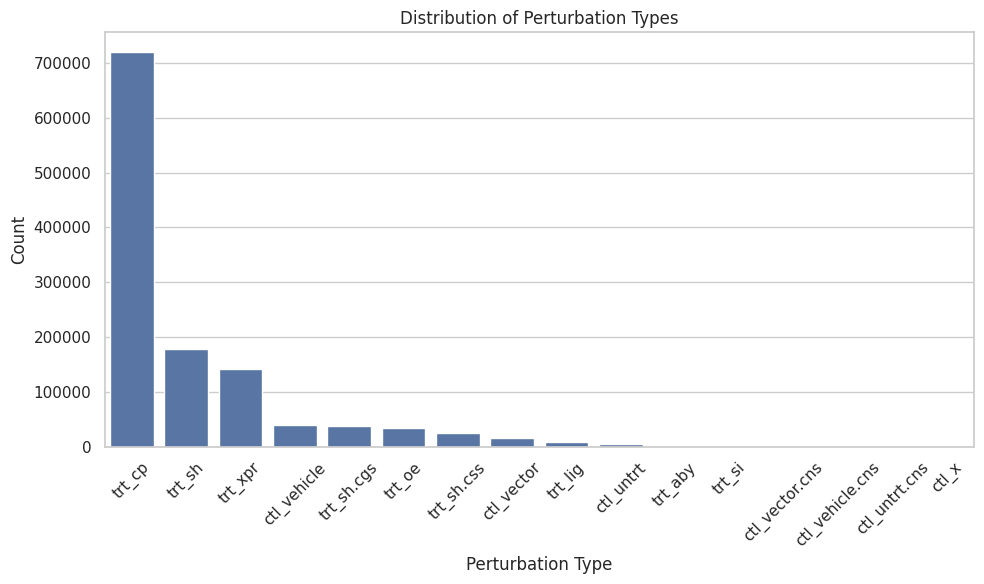

In [16]:
#create a histogram for the pert_type column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=df_sig_info, x='pert_type', order=df_sig_info['pert_type'].value_counts().index)
plt.title('Distribution of Perturbation Types')
plt.xlabel('Perturbation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
# list all distinct values for pert_type
pert_types = df_sig_info['pert_type'].unique()
pert_types

array(['trt_cp', 'trt_oe', 'trt_sh', 'trt_si', 'trt_aby', 'trt_lig',
       'trt_xpr', 'ctl_vector', 'ctl_vehicle', 'ctl_untrt',
       'ctl_vector.cns', 'ctl_vehicle.cns', 'ctl_untrt.cns', 'ctl_x',
       'trt_sh.cgs', 'trt_sh.css'], dtype=object)

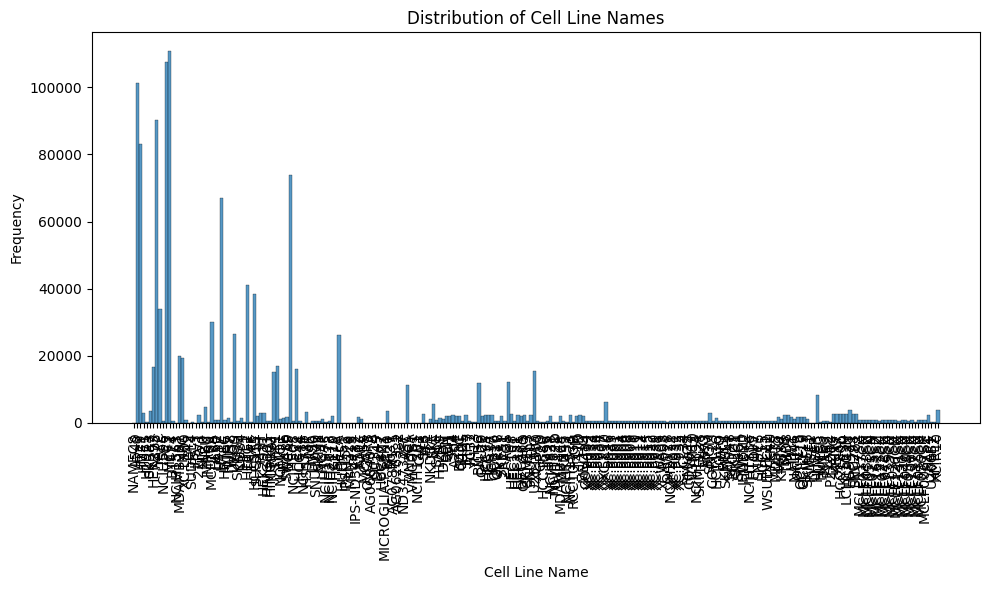

In [4]:
#create a histogram for the values of cell_iname
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df_sig_info['cell_iname'], bins=20)
plt.xticks(rotation=90)
plt.xlabel('Cell Line Name')
plt.ylabel('Frequency')
plt.title('Distribution of Cell Line Names')
plt.tight_layout()
plt.show()


In [5]:
#print the 10 most common cell_iname values
df_sig_info['cell_iname'].value_counts().head(10)

cell_iname
MCF7      110887
PC3       107579
A549      101214
A375       90241
HT29       83048
VCAP       73772
HA1E       67124
HEPG2      41087
HCC515     38477
YAPC       34046
Name: count, dtype: int64

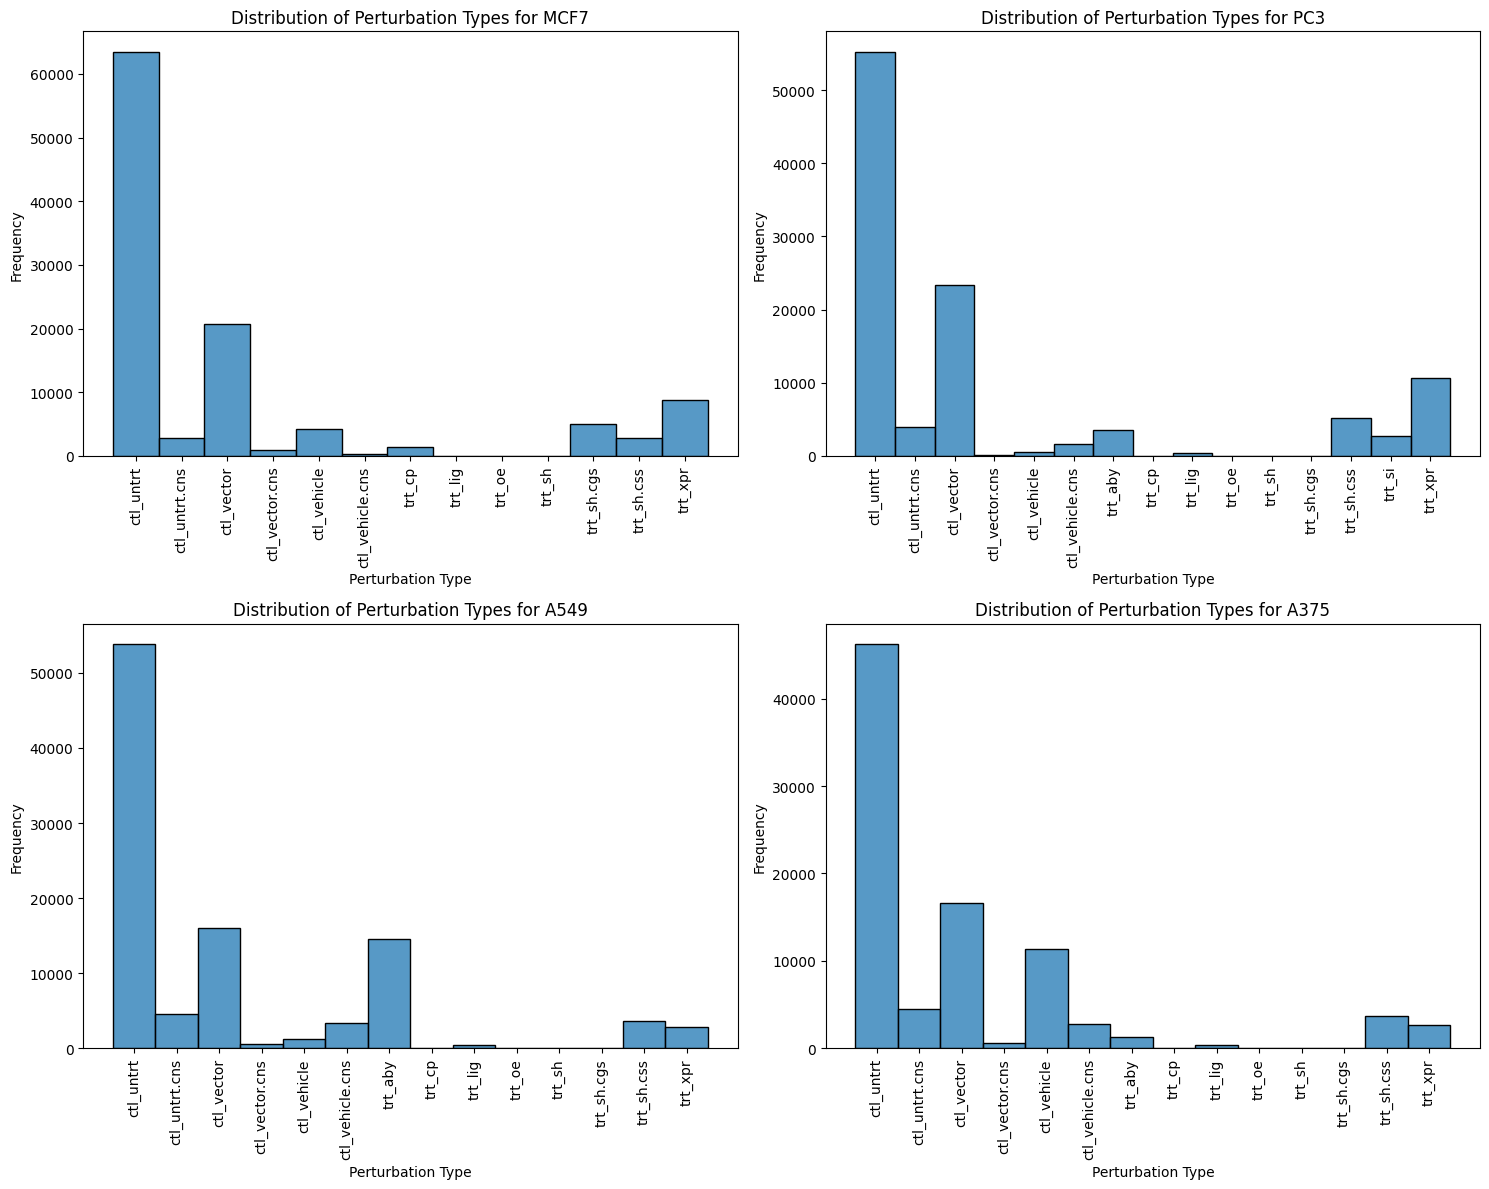

Perturbation types for MCF7:
pert_type
trt_cp             63523
trt_sh             20786
trt_xpr             8861
trt_sh.cgs          5064
ctl_vehicle         4218
trt_oe              2864
trt_sh.css          2746
ctl_vector          1418
trt_lig             1012
ctl_untrt            371
ctl_vector.cns        14
ctl_vehicle.cns        6
ctl_untrt.cns          4
Name: count, dtype: int64
Perturbation types for PC3:
pert_type
trt_cp             55253
trt_sh             23343
trt_xpr            10641
trt_sh.cgs          5166
trt_oe              3895
ctl_vehicle         3562
trt_sh.css          2763
ctl_vector          1687
trt_lig              592
ctl_untrt            445
trt_si               162
trt_aby               48
ctl_vector.cns        18
ctl_untrt.cns          2
ctl_vehicle.cns        2
Name: count, dtype: int64
Perturbation types for A549:
pert_type
trt_cp             53827
trt_sh             16061
trt_xpr            14556
trt_oe              4525
trt_sh.cgs          3620
ctl_veh

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()
# List of cell lines to plot
cell_lines = ['MCF7', 'PC3', 'A549', 'A375']

for i, cell_line in enumerate(cell_lines):
    data = df_sig_info[df_sig_info['cell_iname'] == cell_line]['pert_type']
    sns.histplot(data, bins=20, ax=axes[i])
    sorted_xticks = sorted(data.unique())  # Sort x-ticks alphabetically
    axes[i].set_xticks(range(len(sorted_xticks)))
    axes[i].set_xticklabels(sorted_xticks, rotation=90)
    axes[i].set_xlabel('Perturbation Type')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Perturbation Types for {cell_line}')

plt.tight_layout()
plt.show()

# Print the values
for cell_line in cell_lines:
    print(f'Perturbation types for {cell_line}:')
    print(df_sig_info[df_sig_info['cell_iname'] == cell_line]['pert_type'].value_counts())


In [8]:
# get a list of all distinct values for cmap_name
cmap_names = df_sig_info['cmap_name'].unique()
# read landmark_genes.txt its a textfile without header with one line per gene
landmark_genes = pd.read_csv('landmark_genes.txt', header=None, sep='\t')
# get the intersection of the two lists
landmark_genes_list = landmark_genes[0].tolist()
# get the intersection of the two lists
cmap_names_list = df_sig_info['cmap_name'].tolist()
# get the intersection of the two lists
intersection = set(landmark_genes_list).intersection(set(cmap_names_list))
# Print the intersection
print(f'Intersection of landmark genes and cmap names: {intersection}')
print(f'len of intersection: {len(intersection)}')
print(f'len of cmap names: {len(cmap_names_list)}')
print(f'len of landmark genes: {len(landmark_genes_list)}')

Intersection of landmark genes and cmap names: {'GLOD4', 'TSKU', 'NCAPD2', 'BAD', 'EZH2', 'EPN2', 'ZW10', 'ZNF589', 'SHB', 'PGM1', 'SFN', 'IDE', 'EDEM1', 'BAMBI', 'PLCB3', 'NPRL2', 'CSNK2A2', 'IL13RA1', 'PLSCR3', 'ATMIN', 'PLEKHJ1', 'ADH5', 'CREB1', 'SLC25A4', 'DRAP1', 'NIT1', 'EPB41L2', 'PPP2R5A', 'NUSAP1', 'TMEM109', 'ICMT', 'COPS7A', 'RAB4A', 'ADAM10', 'POLB', 'GRB7', 'TNIP1', 'RAE1', 'HOXA5', 'RAD51C', 'CORO1A', 'ALDOA', 'ATF6', 'RPL39L', 'GNA15', 'PDIA5', 'CSK', 'VGLL4', 'DENND2D', 'SUPV3L1', 'TRAK2', 'TRIB3', 'CSNK1A1', 'TSPAN3', 'CDCA4', 'SDHB', 'RAD9A', 'WIPF2', 'VDAC1', 'CHIC2', 'MSRA', 'POLD4', 'NISCH', 'ERBB2', 'HDAC6', 'ARHGEF2', 'MKNK1', 'LAMA3', 'POLR2K', 'DUSP22', 'PSME1', 'IL4R', 'BLVRA', 'TCEA2', 'MYL9', 'PYGL', 'MAST2', 'ARHGAP1', 'SKP1', 'AURKA', 'TPM1', 'ST3GAL5', 'SLC27A3', 'NGRN', 'FHL2', 'MCM3', 'KIAA0753', 'TCFL5', 'CLPX', 'HS2ST1', 'CREG1', 'CD320', 'FBXL12', 'LSM6', 'STAP2', 'CCNB2', 'RRAGA', 'CNDP2', 'PAFAH1B3', 'GPC1', 'CLSTN1', 'RALGDS', 'GATA2', 'TOMM70', 

In [9]:
# discard all rows of df_sig_info that don't have cmap_name in landmark_genes
df_sig_info_filtered = df_sig_info[df_sig_info['cmap_name'].isin(landmark_genes_list)]
df_sig_info_filtered

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
339,b7,NaN,200.0,ng,200 ng,48 h,48.0,h,HEK293T,CMAP-HSF-CPSF4,...,HEK293T,M01|M02|N01|N02,HSF019_HEK293T_48H_X1_B7_DUO52HI53LO,HSF019_HEK293T_48H_X1_B7_DUO52HI53LO:M01|HSF01...,NaN,HSF,CPSF4,1,1.0,0.0
346,b7,NaN,NaN,NaN,NaN,72 h,72.0,h,PC3,CCSBBROAD304_03428,...,PC3,J24,OEC001_PC3_72H_X2_B7_DUO52HI53LO|OEC001_PC3_72...,OEC001_PC3_72H_X2_B7_DUO52HI53LO:J24|OEC001_PC...,NaN,OEC,EXOSC4,0,0.0,0.0
367,b7,NaN,NaN,NaN,NaN,24 h,24.0,h,A375,CCSBBROAD304_08452,...,A375,B18,OEC001_A375_24H_X1_B7_DUO52HI53LO|OEC001_A375_...,OEC001_A375_24H_X1_B7_DUO52HI53LO:B18|OEC001_A...,NaN,OEC,PIH1D1,0,1.0,0.0
369,b7,NaN,NaN,NaN,NaN,24 h,24.0,h,A375,CCSBBROAD304_06928,...,A375,P14,OEC001_A375_24H_X1_B7_DUO52HI53LO|OEC001_A375_...,OEC001_A375_24H_X1_B7_DUO52HI53LO:P14|OEC001_A...,NaN,OEC,SDHB,0,1.0,0.0
372,b7,NaN,NaN,NaN,NaN,96 h,96.0,h,PC3,TRCN0000350275,...,PC3,P11,TAK001_PC3_96H_X1_B7_DUO52HI53LO|TAK001_PC3_96...,TAK001_PC3_96H_X1_B7_DUO52HI53LO:P11|TAK001_PC...,NaN,TAK,PIK3CA,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044088,b1,NaN,NaN,NaN,NaN,168 h,168.0,h,VCAP,TRCN0000037899,...,VCAP,P03,ERGK017_VCAP_168H_X1_B1_DUO44HI45LO|ERGK017_VC...,ERGK017_VCAP_168H_X1_B1_DUO44HI45LO:P03|ERGK01...,NaN,ERGK,CALM3,0,1.0,0.0
1044099,b2,NaN,NaN,NaN,NaN,120 h,120.0,h,VCAP,TRCN0000039797,...,VCAP,M11,ERGK004_VCAP_120H_X1_B2_DUO52HI53LO|ERGK004_VC...,ERGK004_VCAP_120H_X1_B2_DUO52HI53LO:M11|ERGK00...,NaN,ERGK,AKT1,0,1.0,0.0
1044110,b3,NaN,NaN,NaN,NaN,120 h,120.0,h,VCAP,TRCN0000039901,...,VCAP,C24,ERGK013_VCAP_120H_X1_B3_DUO52HI53LO|ERGK013_VC...,ERGK013_VCAP_120H_X1_B3_DUO52HI53LO:C24|ERGK01...,NaN,ERGK,ABL1,0,1.0,0.0
1044114,b3,NaN,NaN,NaN,NaN,120 h,120.0,h,VCAP,TRCN0000001586,...,VCAP,D08,ERGK016_VCAP_120H_X1_B3_DUO52HI53LO|ERGK016_VC...,ERGK016_VCAP_120H_X1_B3_DUO52HI53LO:D08|ERGK01...,NaN,ERGK,OXSR1,1,1.0,0.0


In [10]:
#print the 10 most common cell_iname values
df_sig_info_filtered['cell_iname'].value_counts().head(10)

cell_iname
PC3       11068
MCF7      10465
A549       8605
A375       7852
HT29       7494
VCAP       6770
HA1E       6105
HEPG2      5446
HCC515     5267
NPC        4413
Name: count, dtype: int64

/tmp/ipykernel_8391/3971017058.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_8391/3971017058.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_8391/3971017058.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_8391/3971017058.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


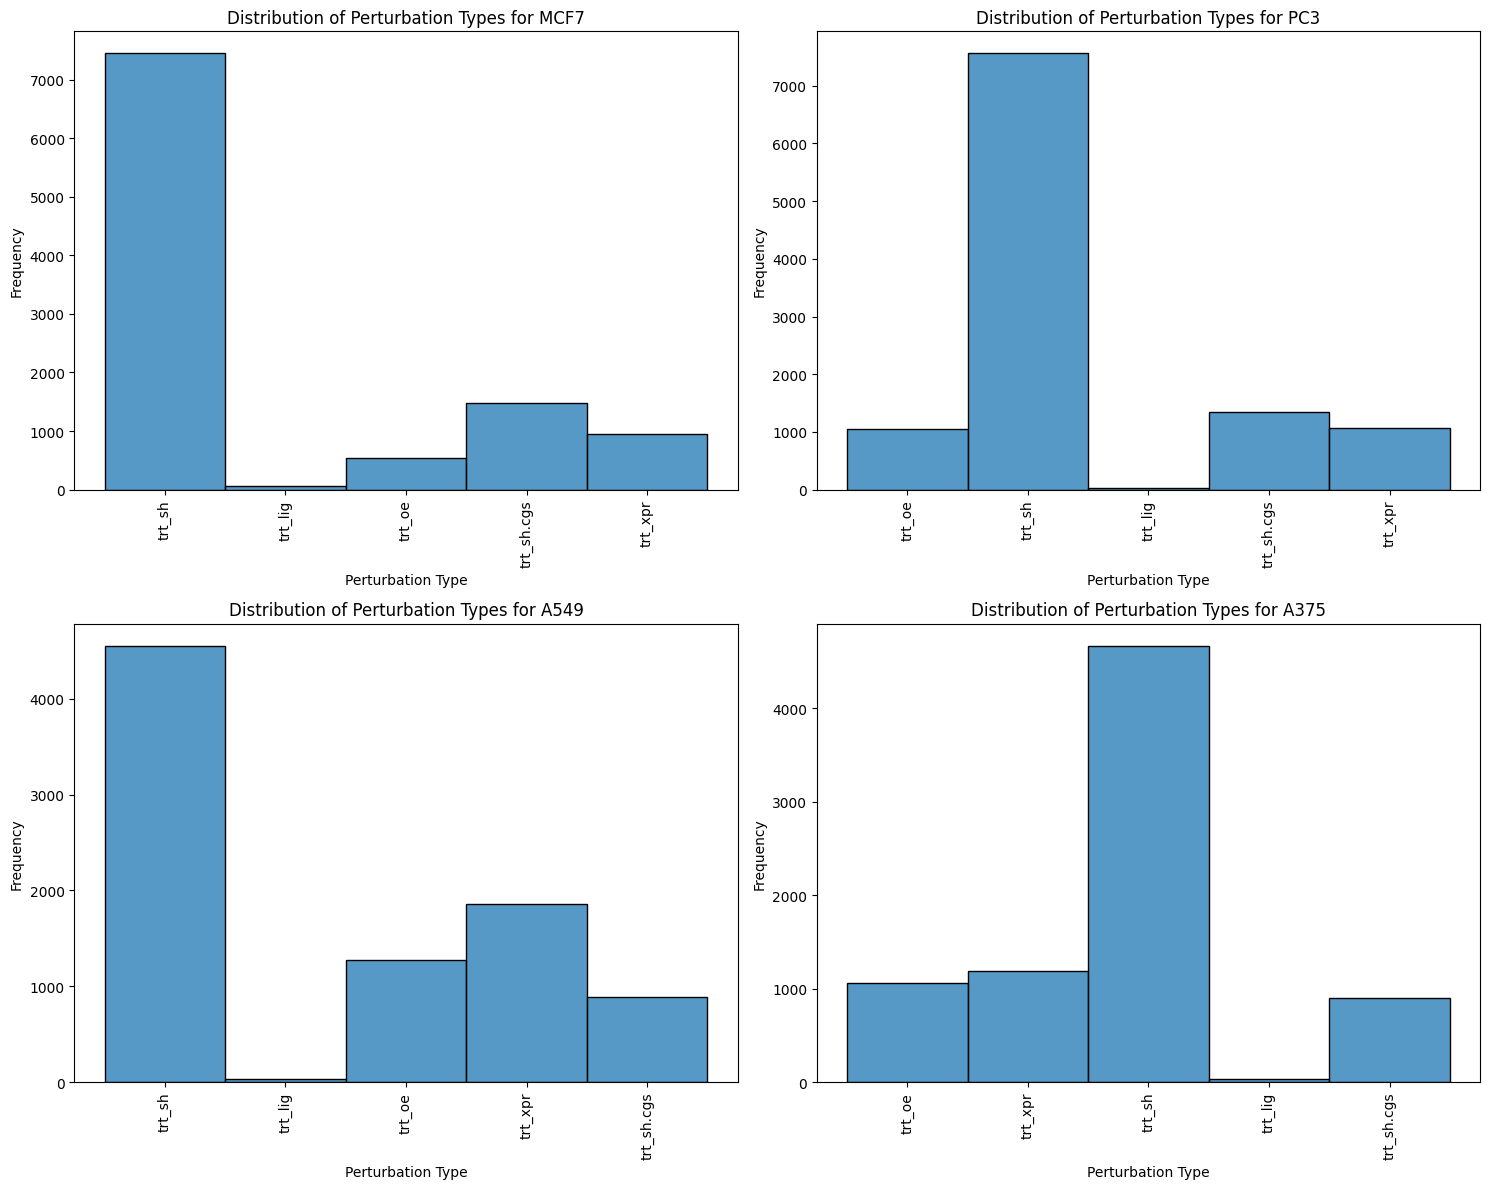

Perturbation types for MCF7:
pert_type
trt_sh        7450
trt_sh.cgs    1470
trt_xpr        950
trt_oe         537
trt_lig         58
Name: count, dtype: int64
Perturbation types for PC3:
pert_type
trt_sh        7565
trt_sh.cgs    1350
trt_xpr       1070
trt_oe        1053
trt_lig         30
Name: count, dtype: int64
Perturbation types for A549:
pert_type
trt_sh        4555
trt_xpr       1855
trt_oe        1276
trt_sh.cgs     889
trt_lig         30
Name: count, dtype: int64
Perturbation types for A375:
pert_type
trt_sh        4668
trt_xpr       1190
trt_oe        1064
trt_sh.cgs     900
trt_lig         30
Name: count, dtype: int64


In [11]:
#create a histogram as before but for the filtered df_sig_info
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, cell_line in enumerate(cell_lines):
    sns.histplot(df_sig_info_filtered[df_sig_info_filtered['cell_iname'] == cell_line]['pert_type'], bins=20, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel('Perturbation Type')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Perturbation Types for {cell_line}')

plt.tight_layout()
plt.show()

# Print the values
for cell_line in cell_lines:
    print(f'Perturbation types for {cell_line}:')
    print(df_sig_info_filtered[df_sig_info_filtered['cell_iname'] == cell_line]['pert_type'].value_counts())

/tmp/ipykernel_8391/3187565686.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_8391/3187565686.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_8391/3187565686.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_8391/3187565686.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


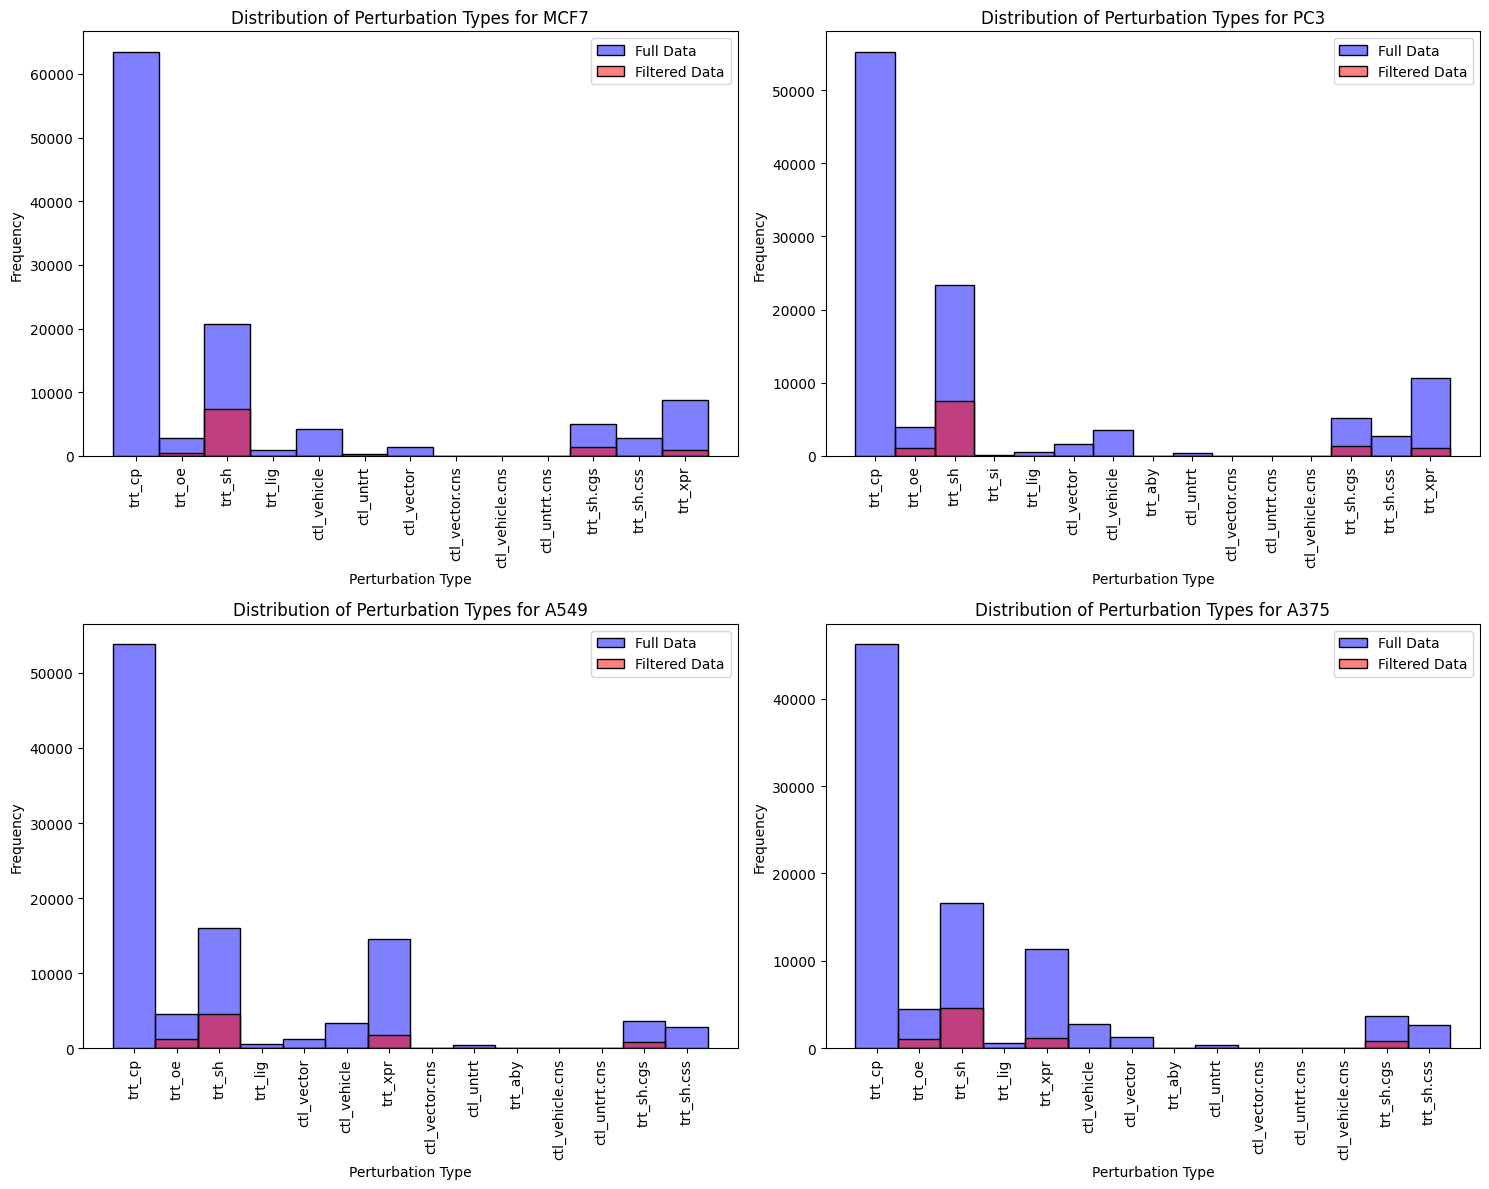

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, cell_line in enumerate(cell_lines):
    data_full = df_sig_info[df_sig_info['cell_iname'] == cell_line]['pert_type']
    data_filtered = df_sig_info_filtered[df_sig_info_filtered['cell_iname'] == cell_line]['pert_type']
    
    sns.histplot(data_full, bins=20, ax=axes[i], color='blue', label='Full Data', alpha=0.5)
    sns.histplot(data_filtered, bins=20, ax=axes[i], color='red', label='Filtered Data', alpha=0.5)
    
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel('Perturbation Type')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Perturbation Types for {cell_line}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the values


In [13]:
for cell_line in cell_lines:
    print(f'Perturbation types for {cell_line} (Filtered Data):')
    # sort values alphabetically
    print(df_sig_info_filtered[df_sig_info_filtered['cell_iname'] == cell_line]['pert_type'].value_counts().sort_index())
    # print labels of perttypes only
    print(df_sig_info_filtered[df_sig_info_filtered['cell_iname'] == cell_line]['pert_type'].value_counts().sort_index().index.tolist())

Perturbation types for MCF7 (Filtered Data):
pert_type
trt_lig         58
trt_oe         537
trt_sh        7450
trt_sh.cgs    1470
trt_xpr        950
Name: count, dtype: int64
['trt_lig', 'trt_oe', 'trt_sh', 'trt_sh.cgs', 'trt_xpr']
Perturbation types for PC3 (Filtered Data):
pert_type
trt_lig         30
trt_oe        1053
trt_sh        7565
trt_sh.cgs    1350
trt_xpr       1070
Name: count, dtype: int64
['trt_lig', 'trt_oe', 'trt_sh', 'trt_sh.cgs', 'trt_xpr']
Perturbation types for A549 (Filtered Data):
pert_type
trt_lig         30
trt_oe        1276
trt_sh        4555
trt_sh.cgs     889
trt_xpr       1855
Name: count, dtype: int64
['trt_lig', 'trt_oe', 'trt_sh', 'trt_sh.cgs', 'trt_xpr']
Perturbation types for A375 (Filtered Data):
pert_type
trt_lig         30
trt_oe        1064
trt_sh        4668
trt_sh.cgs     900
trt_xpr       1190
Name: count, dtype: int64
['trt_lig', 'trt_oe', 'trt_sh', 'trt_sh.cgs', 'trt_xpr']


# Crispr Analysis

In [17]:
# from df_sig_info filter out all rows that have a pert_type that contains trt_xpr
df_sig_info_xpr = df_sig_info[df_sig_info['pert_type'].str.contains('trt_xpr')]

In [18]:
df_sig_info_xpr

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
536,b33,NaN,NaN,NaN,NaN,96 h,96.0,h,ES2,HAHN-000061,...,ES2,G06,HAHN001_ES2_96H_X2.A2_B33,HAHN001_ES2_96H_X2.A2_B33:G06,NaN,HAHN,AURKB,0,0.0,0.0
537,b33,NaN,NaN,NaN,NaN,96 h,96.0,h,HCC44,BRDN0001062183,...,HCC44,E15,HAHN001_HCC44_96H_X1.A2_B33,HAHN001_HCC44_96H_X1.A2_B33:E15,NaN,HAHN,RAC1,0,0.0,0.0
538,b33,NaN,NaN,NaN,NaN,96 h,96.0,h,HCC44,BRDN0000734411,...,HCC44,K22,HAHN001_HCC44_96H_X1.A2_B33,HAHN001_HCC44_96H_X1.A2_B33:K22,NaN,HAHN,KIF11,0,0.0,0.0
539,b33,NaN,NaN,NaN,NaN,96 h,96.0,h,HCC44,HAHN-000098,...,HCC44,L09,HAHN001_HCC44_96H_X1.A2_B33,HAHN001_HCC44_96H_X1.A2_B33:L09,NaN,HAHN,XBP,0,0.0,0.0
540,b33,NaN,NaN,NaN,NaN,96 h,96.0,h,HCC44,HAHN-000086,...,HCC44,H08,HAHN001_HCC44_96H_X1.A2_B33,HAHN001_HCC44_96H_X1.A2_B33:H08,NaN,HAHN,ORC4,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036436,b44,NaN,NaN,Unknown,NaN,96 h,96.0,h,LCLC103H.311,BRDN0001489479,...,LCLC103H,L21,XPR044_LCLC103H.311_96H_X3_B44|XPR044_LCLC103H...,XPR044_LCLC103H.311_96H_X3_B44:L21|XPR044_LCLC...,NaN,XPR,CCNA2,0,NaN,NaN
1036437,b44,NaN,NaN,Unknown,NaN,96 h,96.0,h,LCLC103H.311,BRDN0001486533,...,LCLC103H,H03,XPR044_LCLC103H.311_96H_X3_B44|XPR044_LCLC103H...,XPR044_LCLC103H.311_96H_X3_B44:H03|XPR044_LCLC...,NaN,XPR,NaN,0,NaN,NaN
1036438,b44,NaN,NaN,Unknown,NaN,96 h,96.0,h,LCLC103H.311,BRDN0001482620,...,LCLC103H,O24,XPR044_LCLC103H.311_96H_X3_B44|XPR044_LCLC103H...,XPR044_LCLC103H.311_96H_X3_B44:O24|XPR044_LCLC...,NaN,XPR,NaN,0,NaN,NaN
1036439,b44,NaN,NaN,Unknown,NaN,96 h,96.0,h,LCLC103H.311,BRDN0001146116,...,LCLC103H,E06,XPR044_LCLC103H.311_96H_X3_B44|XPR044_LCLC103H...,XPR044_LCLC103H.311_96H_X3_B44:E06|XPR044_LCLC...,NaN,XPR,CKS2,0,NaN,NaN


In [19]:
# print the ten most common cell_iname values
df_sig_info_xpr['cell_iname'].value_counts().head(10)

cell_iname
ES2       14567
A549      14556
U251MG    14246
A375      11344
HT29      10643
AGS       10643
BICR6     10643
YAPC      10643
PC3       10641
MCF7       8861
Name: count, dtype: int64

In [20]:
# discard all rows of df_sig_info_xpr that don't have cmap_name in landmark_genes
df_sig_info_xpr_filtered = df_sig_info_xpr[df_sig_info_xpr['cmap_name'].isin(landmark_genes_list)]
df_sig_info_xpr_filtered

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
536,b33,NaN,NaN,NaN,NaN,96 h,96.0,h,ES2,HAHN-000061,...,ES2,G06,HAHN001_ES2_96H_X2.A2_B33,HAHN001_ES2_96H_X2.A2_B33:G06,NaN,HAHN,AURKB,0,0.0,0.0
544,b21,NaN,NaN,NaN,NaN,96 h,96.0,h,A375,BRDN0001054845,...,A375,A04,XPRJJ001_A375_96H_X1_B21|XPRJJ001_A375_96H_X2_...,XPRJJ001_A375_96H_X1_B21:A04|XPRJJ001_A375_96H...,NaN,XPRJJ,AURKB,1,1.0,0.0
698,b21,NaN,NaN,NaN,NaN,96 h,96.0,h,A375,BRDN0001057009,...,A375,N09,XPRJJ001_A375_96H_X1_B21|XPRJJ001_A375_96H_X2_...,XPRJJ001_A375_96H_X1_B21:N09|XPRJJ001_A375_96H...,NaN,XPRJJ,SUV39H1,1,1.0,0.0
1291,b33,NaN,NaN,NaN,NaN,96 h,96.0,h,HCC44,BRDN0000733051,...,HCC44,I10,HAHN001_HCC44_96H_X1.A2_B33,HAHN001_HCC44_96H_X1.A2_B33:I10,NaN,HAHN,EZH2,0,0.0,0.0
1295,b21,NaN,NaN,NaN,NaN,96 h,96.0,h,A375,BRDN0001057180,...,A375,M01,XPRJJ001_A375_96H_X1_B21|XPRJJ001_A375_96H_X2_...,XPRJJ001_A375_96H_X1_B21:M01|XPRJJ001_A375_96H...,NaN,XPRJJ,EZH2,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036427,b44,NaN,NaN,Unknown,NaN,96 h,96.0,h,LCLC103H.311,BRDN0001487607,...,LCLC103H,F17,XPR042_LCLC103H.311_96H_X3_B44|XPR042_LCLC103H...,XPR042_LCLC103H.311_96H_X3_B44:F17|XPR042_LCLC...,NaN,XPR,USP1,0,NaN,NaN
1036428,b44,NaN,NaN,Unknown,NaN,96 h,96.0,h,LCLC103H.311,BRDN0001057193,...,LCLC103H,A05,XPR042_LCLC103H.311_96H_X3_B44|XPR042_LCLC103H...,XPR042_LCLC103H.311_96H_X3_B44:A05|XPR042_LCLC...,NaN,XPR,HDAC6,0,NaN,NaN
1036430,b44,NaN,NaN,Unknown,NaN,96 h,96.0,h,LCLC103H.311,BRDN0001487384,...,LCLC103H,O18,XPR043_LCLC103H.311_96H_X3_B44|XPR043_LCLC103H...,XPR043_LCLC103H.311_96H_X3_B44:O18|XPR043_LCLC...,NaN,XPR,MIF,0,NaN,NaN
1036433,b44,NaN,NaN,Unknown,NaN,96 h,96.0,h,LCLC103H.311,BRDN0000579834,...,LCLC103H,I21,XPR043_LCLC103H.311_96H_X3_B44|XPR043_LCLC103H...,XPR043_LCLC103H.311_96H_X3_B44:I21|XPR043_LCLC...,NaN,XPR,NFATC4,0,NaN,NaN


In [22]:
# print the ten most common cell_iname values
df_sig_info_xpr_filtered['cell_iname'].value_counts().head(10)

cell_iname
A549      1855
ES2       1854
U251MG    1771
A375      1190
HT29      1070
YAPC      1070
PC3       1070
BICR6     1070
AGS       1070
MCF7       950
Name: count, dtype: int64